# Analyse d'une base de données des employés

## Présentation de la base de données

__L'ensemble de données comprend 4 variables sur 74 employés. Les valeurs sont qualitatives et sont les suivantes:__

- Work_accident: 0 pas d'accident pendant le séjour du salarié, 1 - accident lors du séjour du salarié 
- left: 0 indique que l'employé reste dans l'entreprise, 1 indique - l'employé a quitté l'entreprise 
- sales: indique le département de l'employé (IT, support, marketing, product_mng, sales, hr, management, technical, accounting, RandD)
- salary: indique la catégorie du salaire (low, medium, high)

In [1]:
import pandas as pd
import numpy as np
from fanalysis.mca import MCA
import matplotlib.pyplot as plt

## Enoncé

__1. Extraire les statistiques sur le jeux de données__

__2. Analyse ACM:__
   - Effectuer une ACM sur le jeu de données. Justifier le nombre de composantes retournées par l'ACM.
   - Afficher les valeurs propres et les ratio de variance expliquée par chaque composante. 
   - Quelle est le nombre de facteurs à garder? justifier le choix.
   - Effectuer l'ACM avec le nombre de facteurs gardés. 
   - Afficher les coordonnées, les contributions et les qualités de représentation des points lignes sur chaque axe. 
   - Tracer le graphique des points lignes sur les deux premières composantes et interpréter le résultats.
   - Afficher les coordonnées, les contributions et les qualités de représentation des points colonnes sur chaque axe.
   - Tracer le graphique des points colonnes sur les deux premières composantes et interprétez le résultats.
   - Est-il intéressant de tracer les graphiques (points lignes et points colonnes) sur les autres dimensions ? Effectuer la démarche le cas échéant, et analyser.

In [3]:
data = pd.read_excel('MT15_exam_acm.xls')
data.index = [f'Salarié {i+1}' for i in range(len(data.index))]

Je fais d'abord afficher le data frame afin de le voir correctement

In [4]:
data 

Work_accident  left        sales  salary
Salarié 1    No accident  stay           IT  medium
Salarié 2       Accident  stay      support     low
Salarié 3    No accident  stay    marketing  medium
Salarié 4       Accident  stay  product_mng     low
Salarié 5    No accident  stay      support     low
...                  ...   ...          ...     ...
Salarié 70   No accident  stay      support     low
Salarié 71   No accident  stay        sales  medium
Salarié 72   No accident  stay      support  medium
Salarié 73   No accident  left        sales     low
Salarié 74   No accident  stay        sales     low

[74 rows x 4 columns]

In [6]:
X = data.values
X

array([['No accident', 'stay', 'IT', 'medium'],
       ['Accident', 'stay', 'support', 'low'],
       ['No accident', 'stay', 'marketing', 'medium'],
       ['Accident', 'stay', 'product_mng', 'low'],
       ['No accident', 'stay', 'support', 'low'],
       ['No accident', 'stay', 'sales', 'low'],
       ['Accident', 'stay', 'sales', 'low'],
       ['No accident', 'stay', 'sales', 'medium'],
       ['No accident', 'stay', 'hr', 'low'],
       ['No accident', 'stay', 'sales', 'medium'],
       ['No accident', 'stay', 'management', 'medium'],
       ['No accident', 'stay', 'technical', 'low'],
       ['No accident', 'stay', 'sales', 'medium'],
       ['No accident', 'stay', 'sales', 'low'],
       ['No accident', 'stay', 'sales', 'low'],
       ['No accident', 'stay', 'sales', 'medium'],
       ['No accident', 'stay', 'support', 'medium'],
       ['No accident', 'left', 'IT', 'low'],
       ['Accident', 'stay', 'management', 'medium'],
       ['No accident', 'left', 'product_mng', 'low']

On fait l'analyse ACM sur le jeu de données à disposition 

In [8]:
my_mca = MCA(row_labels=data.index.values, var_labels=data.columns.values)

In [9]:
my_mca.fit(X)

MCA(row_labels=array(['Salarié 1', 'Salarié 2', 'Salarié 3', 'Salarié 4', 'Salarié 5',
       'Salarié 6', 'Salarié 7', 'Salarié 8', 'Salarié 9', 'Salarié 10',
       'Salarié 11', 'Salarié 12', 'Salarié 13', 'Salarié 14',
       'Salarié 15', 'Salarié 16', 'Salarié 17', 'Salarié 18',
       'Salarié 19', 'Salarié 20', 'Salarié 21', 'Salarié 22',
       'Salarié 23', 'Salarié 24', 'Salarié 25', 'Salarié 26',
       'Salarié 27', 'Salarié 28', '...
       'Salarié 51', 'Salarié 52', 'Salarié 53', 'Salarié 54',
       'Salarié 55', 'Salarié 56', 'Salarié 57', 'Salarié 58',
       'Salarié 59', 'Salarié 60', 'Salarié 61', 'Salarié 62',
       'Salarié 63', 'Salarié 64', 'Salarié 65', 'Salarié 66',
       'Salarié 67', 'Salarié 68', 'Salarié 69', 'Salarié 70',
       'Salarié 71', 'Salarié 72', 'Salarié 73', 'Salarié 74'],
      dtype=object),
    var_labels=array(['Work_accident', 'left', 'sales', 'salary'], dtype=object))

__Analyse des valeurs propres__ 

In [10]:
print(my_mca.eig_)

[[  0.37787717   0.34730269   0.32269661   0.29730798   0.25
    0.25         0.25         0.25         0.25         0.21544703
    0.17508636   0.15387333   0.11040882]
 [ 11.62698977  10.68623674   9.9291266    9.14793789   7.69230769
    7.69230769   7.69230769   7.69230769   7.69230769   6.62913945
    5.38727259   4.734564     3.39719451]
 [ 11.62698977  22.31322651  32.24235311  41.390291    49.08259869
   56.77490638  64.46721407  72.15952176  79.85182946  86.48096891
   91.8682415   96.60280549 100.        ]]


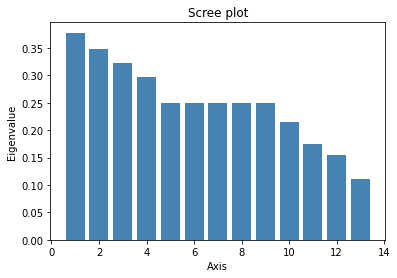

In [12]:
my_mca.plot_eigenvalues()

In [15]:
print("La moyenne des valeurs propres : \n", np.average(my_mca.eig_[0]))
print("La moyenne des valeurs propres est aussi égale à 1/p : \n", 1/4)
print("On retient donc 4 facteurs")

La moyenne des valeurs propres : 
 0.25000000000000006
La moyenne des valeurs propres est aussi égale à 1/p : 
 0.25
On retient donc 4 facteurs


On fait donc le calcul en retenant que l'on a 4 facteurs

In [24]:
#Instanciation
my_mca = MCA(row_labels=data.index.values, var_labels=data.columns.values[0:6],n_components=4)
#Calcul
my_mca.fit(X)

MCA(n_components=4,
    row_labels=array(['Salarié 1', 'Salarié 2', 'Salarié 3', 'Salarié 4', 'Salarié 5',
       'Salarié 6', 'Salarié 7', 'Salarié 8', 'Salarié 9', 'Salarié 10',
       'Salarié 11', 'Salarié 12', 'Salarié 13', 'Salarié 14',
       'Salarié 15', 'Salarié 16', 'Salarié 17', 'Salarié 18',
       'Salarié 19', 'Salarié 20', 'Salarié 21', 'Salarié 22',
       'Salarié 23', 'Salarié 24', 'Salarié 25', 'Salarié 26',
       'Salarié 27...
       'Salarié 51', 'Salarié 52', 'Salarié 53', 'Salarié 54',
       'Salarié 55', 'Salarié 56', 'Salarié 57', 'Salarié 58',
       'Salarié 59', 'Salarié 60', 'Salarié 61', 'Salarié 62',
       'Salarié 63', 'Salarié 64', 'Salarié 65', 'Salarié 66',
       'Salarié 67', 'Salarié 68', 'Salarié 69', 'Salarié 70',
       'Salarié 71', 'Salarié 72', 'Salarié 73', 'Salarié 74'],
      dtype=object),
    var_labels=array(['Work_accident', 'left', 'sales', 'salary'], dtype=object))

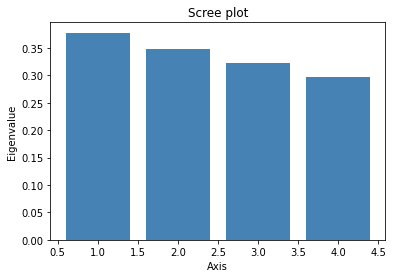

In [25]:
my_mca.plot_eigenvalues()

on affiche le ratio des valeurs propres en pourcentage

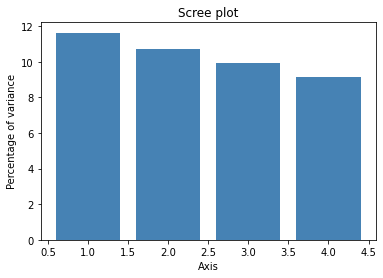

In [20]:
my_mca.plot_eigenvalues(type="percentage")

et ensuite, on affiche les valeurs propres en cumulatives 

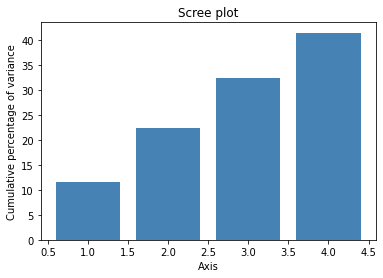

In [21]:
my_mca.plot_eigenvalues(type="cumulative")

## Extraction des statistiques sur les points lignes

In [35]:
df_rows = my_mca.row_topandas()
print(df_rows)

            row_coord_dim1  row_coord_dim2  row_coord_dim3  row_coord_dim4  \
Salarié 1         0.374046        0.710277       -0.236277       -0.226184   
Salarié 2         0.006166       -1.068118        0.181460       -0.263650   
Salarié 3         0.603028        0.125399        0.339264        0.876230   
Salarié 4        -0.458488       -1.338579        0.754172        0.348172   
Salarié 5        -0.226739       -0.287572       -0.498889       -0.066868   
...                    ...             ...             ...             ...   
Salarié 70       -0.226739       -0.287572       -0.498889       -0.066868   
Salarié 71        0.490848        0.138282       -0.414697        0.055623   
Salarié 72        0.294542        0.107055       -0.363081        0.225637   
Salarié 73       -0.707690       -0.055972       -0.318775        0.329843   
Salarié 74       -0.030433       -0.256346       -0.550505       -0.236882   

            row_contrib_dim1  row_contrib_dim2  row_contrib_dim

__Contributions des points lignes__

In [37]:
print(my_mca.row_contrib_)

[[5.00343368e-01 1.96298082e+00 2.33785299e-01 2.32532676e-01]
 [1.35968905e-04 4.43913620e+00 1.37890454e-01 3.15949485e-01]
 [1.30044652e+00 6.11856252e-02 4.82001292e-01 3.48977760e+00]
 [7.51749203e-01 6.97185490e+00 2.38184995e+00 5.50996619e-01]
 [1.83852608e-01 3.21776025e-01 1.04227497e+00 2.03233408e-02]
 [3.31204699e-03 2.55689128e-01 1.26910258e+00 2.55049995e-01]
 [1.46605178e-01 4.18337416e+00 7.06019083e-02 8.54808663e-01]
 [8.61611871e-01 7.44029935e-02 7.20171704e-01 1.40627020e-02]
 [5.66426019e-01 1.25337701e+00 4.41095606e+00 5.29125951e+00]
 [8.61611871e-01 7.44029935e-02 7.20171704e-01 1.40627020e-02]
 [1.86093928e+00 1.11153505e+00 1.96982338e+00 9.21736447e-02]
 [2.13215910e+00 2.25603425e-02 2.88385261e-03 7.62503861e-01]
 [8.61611871e-01 7.44029935e-02 7.20171704e-01 1.40627020e-02]
 [3.31204699e-03 2.55689128e-01 1.26910258e+00 2.55049995e-01]
 [3.31204699e-03 2.55689128e-01 1.26910258e+00 2.55049995e-01]
 [8.61611871e-01 7.44029935e-02 7.20171704e-01 1.406270

__Cos2 des points lignes__

In [38]:
print(my_mca.row_cos2_)

[[6.33508670e-02 2.28432543e-01 2.52781550e-02 2.31645742e-02]
 [1.14453827e-05 3.43436691e-01 9.91216860e-03 2.09249433e-02]
 [1.30067288e-01 5.62448148e-03 4.11687375e-02 2.74618161e-01]
 [3.35525783e-02 2.85995212e-01 9.07843688e-02 1.93489665e-02]
 [2.91939221e-02 4.69606213e-02 1.41334673e-01 2.53906412e-03]
 [1.04823103e-03 7.43755658e-02 3.43005439e-01 6.35099479e-02]
 [1.67705465e-02 4.39827232e-01 6.89696627e-03 7.69347836e-02]
 [2.51679719e-01 1.99748928e-02 1.79645506e-01 3.23192472e-03]
 [8.52508948e-03 1.73378394e-02 5.66933658e-02 6.26571636e-02]
 [2.51679719e-01 1.99748928e-02 1.79645506e-01 3.23192472e-03]
 [1.86126320e-01 1.02177731e-01 1.68246730e-01 7.25334384e-03]
 [2.49286241e-01 2.42427504e-03 2.87935704e-04 7.01417610e-02]
 [2.51679719e-01 1.99748928e-02 1.79645506e-01 3.23192472e-03]
 [1.04823103e-03 7.43755658e-02 3.43005439e-01 6.35099479e-02]
 [1.04823103e-03 7.43755658e-02 3.43005439e-01 6.35099479e-02]
 [2.51679719e-01 1.99748928e-02 1.79645506e-01 3.231924

__Mapping des points lignes__

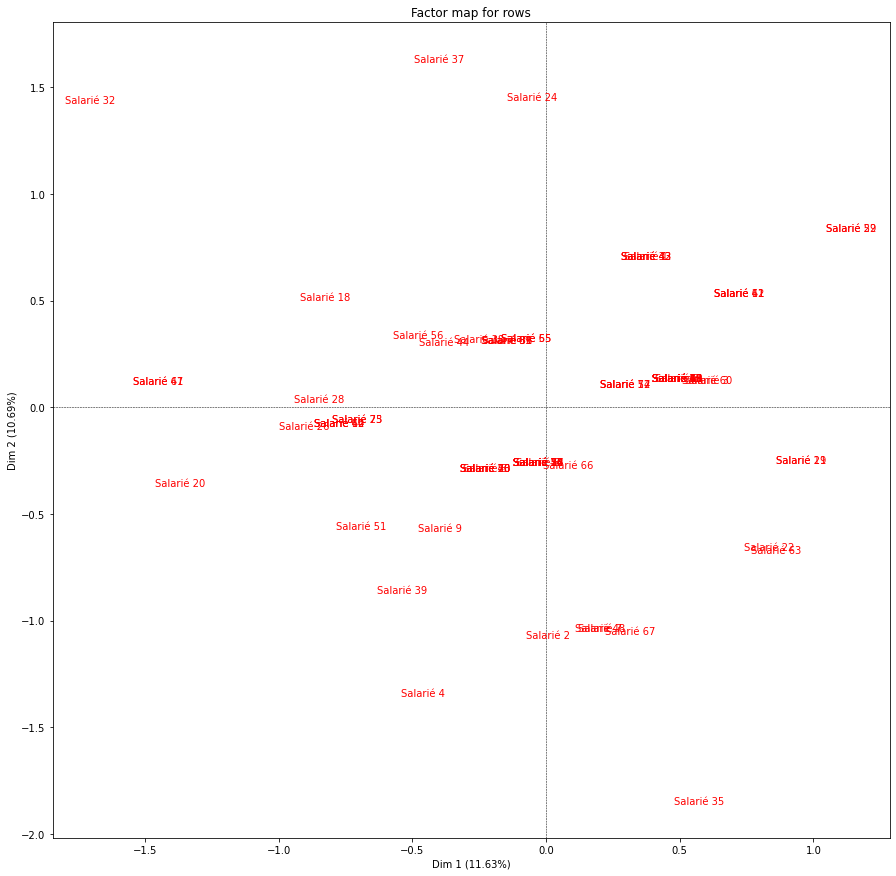

In [39]:
my_mca.mapping_row(num_x_axis=1, num_y_axis=2,figsize=(15,15))

On peut facilement remarquer qu'il y a des groupes d'individus c'est à dire plusieurs individus qui se rapprochent dans le graphique. On voit également que certains salariés sont très éloignés des autres comme le salarié 35, 32 ou même 37. Ce genre d'individu montre un comportement complètement différent du reste des individus. Néanmoins, pour faire une analyse beaucoup plus détaillée, il est surement préférable de regarder avec les points colonnes. 


## Extraction des statistiques sur les points colonnes

In [26]:
df_cols = my_mca.col_topandas()
print(df_cols)

                           col_coord_dim1  col_coord_dim2  col_coord_dim3  \
Work_accident_Accident           0.495293       -1.591332        1.337018   
Work_accident_No accident       -0.077390        0.248646       -0.208909   
left_left                       -1.372737        0.389361        0.434048   
left_stay                        0.292551       -0.082979       -0.092502   
sales_IT                        -0.030868        1.118916       -0.320113   
sales_RandD                      1.165297       -2.131744        1.382112   
sales_accounting                 1.858421        1.427036       -0.745457   
sales_hr                        -0.647422       -0.963067       -1.806684   
sales_management                 0.823152        0.704510        1.775187   
sales_marketing                  0.532168       -0.259815        0.987662   
sales_product_mng               -1.368882       -0.940614        0.693103   
sales_sales                      0.256332       -0.229446       -0.725529   

__Contributions des points colonnes__

In [28]:
print(my_mca.col_contrib_)

[[2.19322162e+00 2.46332367e+01 1.87149345e+01 1.56565891e+00]
 [3.42690878e-01 3.84894324e+00 2.92420852e+00 2.44634205e-01]
 [2.19015945e+01 1.91711918e+00 2.56408647e+00 1.53360368e+01]
 [4.66755293e+00 4.08566383e-01 5.46444658e-01 3.26833571e+00]
 [7.66690255e-03 1.09606859e+01 9.65525537e-01 5.85792641e+00]
 [2.42806999e+00 8.84097926e+00 3.99972705e+00 4.62872761e+00]
 [6.17555439e+00 3.96186522e+00 1.16356014e+00 4.40719090e+00]
 [3.74742156e-01 9.02222348e-01 3.41726243e+00 4.44930833e+00]
 [4.24048948e+00 3.37965588e+00 2.30940404e+01 2.62170857e+00]
 [1.77236429e+00 4.59648224e-01 7.14872825e+00 2.15918166e+01]
 [6.70115340e+00 3.44257119e+00 2.01173107e+00 1.11041820e+01]
 [1.35111279e+00 1.17785150e+00 1.26751067e+01 5.28494122e-01]
 [5.03902842e-01 9.82741728e-01 4.26052812e+00 6.53231928e-01]
 [1.75725683e+01 2.96940727e-01 2.86614422e+00 2.44738453e+00]
 [3.66982438e+00 1.91117843e+01 1.14052276e+01 1.25948560e+01]
 [1.01400497e+01 1.07989169e+01 1.99522857e+00 2.001605

__Cos2 des points colonnes__

In [29]:
print(my_mca.col_cos2_)

[[3.83305373e-02 3.95677513e-01 2.79315128e-01 2.15285837e-02]
 [3.83305373e-02 3.95677513e-01 2.79315128e-01 2.15285837e-02]
 [4.01594967e-01 3.23086745e-02 4.01503146e-02 2.21249137e-01]
 [4.01594967e-01 3.23086745e-02 4.01503146e-02 2.21249137e-01]
 [1.31931636e-04 1.73350156e-01 1.41885014e-02 7.93101614e-02]
 [3.77199465e-02 1.26231499e-01 5.30620444e-02 5.65753705e-02]
 [9.59369300e-02 5.65675102e-02 1.54362733e-02 5.38676024e-02]
 [5.74185279e-03 1.27054656e-02 4.47138012e-02 5.36374252e-02]
 [7.07918969e-02 5.18558244e-02 3.29238973e-01 3.44356187e-02]
 [2.95883366e-02 7.05262263e-03 1.01915469e-01 2.83604200e-01]
 [1.07076430e-01 5.05574025e-02 2.74509895e-02 1.39600448e-01]
 [2.96321928e-02 2.37421599e-02 2.37392813e-01 9.11944197e-03]
 [8.94640636e-03 1.60360983e-02 6.45965028e-02 9.12483738e-03]
 [2.97806154e-01 4.62514865e-03 4.14801410e-02 3.26329664e-02]
 [5.78135043e-02 2.76721402e-01 1.53437575e-01 1.56110867e-01]
 [3.15050333e-01 3.08373864e-01 5.29390658e-02 4.892990

__Mapping des points colonnes__

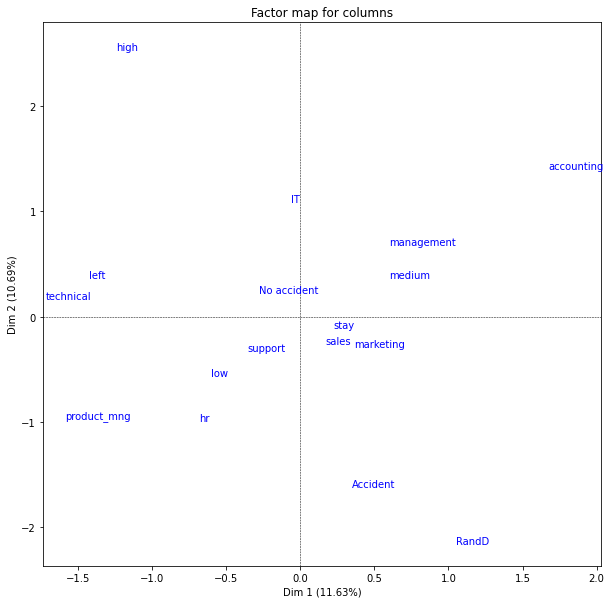

In [40]:
my_mca.mapping_col(num_x_axis=1, num_y_axis=2,figsize=(10,10))

On peut voir que les points-colonnes au centre du graphique représentent un comportement moyen au sein de l'étude. On peut alors dire que "No Accident" a un comportement moyen. Contrairement aux autres qui sont plus éloignés sur le graphique qui montrent un comportement très peu commun comme par exemple RandD et high. 

Je pense qu'il est plus pertinent de faire une représentation avec les points lignes et les points colonnes car on peut les associer ensemble et donc rendre l'étude plus pertinente. Bien que comme nous avons beaucoup d'individus la lecture est compliquée, nous pouvons quand même extraire des informations importantes pour l'analyse

__Mapping simultané des points lignes et colonnes__

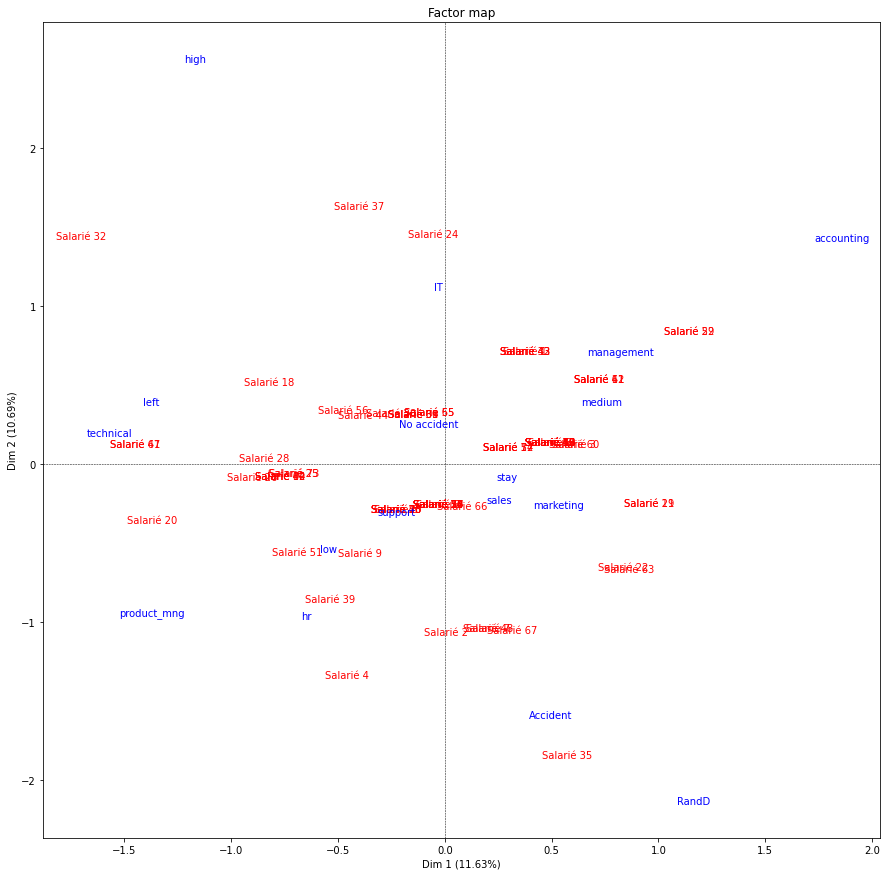

In [32]:
# Les paramètres de la méthode mapping indiquent que ce sont les axes 1 et 2 qui sont ici représentés
my_mca.mapping(num_x_axis=1, num_y_axis=2,figsize=(15,15))